# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

In [32]:
# Set the API base URL and testing the response format

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
url_api = f"{url}appid={weather_api_key}&units={units}&q="

city = cities[0]
city_url = url_api + city
city_weather = requests.get(city_url).json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 13.4626, 'lon': 144.6933},
 'dt': 1709413832,
 'id': 4038473,
 'main': {'feels_like': 24.66,
          'humidity': 85,
          'pressure': 1015,
          'temp': 23.99,
          'temp_max': 25.03,
          'temp_min': 22.61},
 'name': 'Piti Village',
 'sys': {'country': 'GU',
         'id': 2076599,
         'sunrise': 1709411787,
         'sunset': 1709454614,
         'type': 2},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 2.06}}


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
url_api = f"{url}appid={weather_api_key}&units={units}&q="



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url_api + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | piti village
Processing Record 2 of Set 1 | outjo
Processing Record 3 of Set 1 | changji
Processing Record 4 of Set 1 | kencong
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | el porvenir
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | batyrevo
Processing Record 16 of Set 1 | inhambane
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | ascension
Processing Record 19 of Set 1 | maceio
Processing Record 20 of Set 1 | onguday
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | tura
Processing Record 23 of Set 1 | 

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,piti village,13.4626,144.6933,25.03,85,20,2.06,GU,1709413832
1,outjo,-20.1167,16.1500,25.13,37,74,2.99,NA,1709414004
2,changji,44.0167,87.3167,-9.56,79,100,1.00,CN,1709414004
3,kencong,-8.2833,113.3667,25.06,90,100,1.12,ID,1709414004
4,longyearbyen,78.2186,15.6401,-8.09,73,75,1.03,SJ,1709413725


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,piti village,13.4626,144.6933,25.03,85,20,2.06,GU,1709413832
1,outjo,-20.1167,16.1500,25.13,37,74,2.99,NaN,1709414004
2,changji,44.0167,87.3167,-9.56,79,100,1.00,CN,1709414004
3,kencong,-8.2833,113.3667,25.06,90,100,1.12,ID,1709414004
4,longyearbyen,78.2186,15.6401,-8.09,73,75,1.03,SJ,1709413725


In [49]:
#checking city_data info
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 577
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        578 non-null    object 
 1   Lat         578 non-null    float64
 2   Lng         578 non-null    float64
 3   Max Temp    578 non-null    float64
 4   Humidity    578 non-null    int64  
 5   Cloudiness  578 non-null    int64  
 6   Wind Speed  578 non-null    float64
 7   Country     572 non-null    object 
 8   Date        578 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 45.2+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

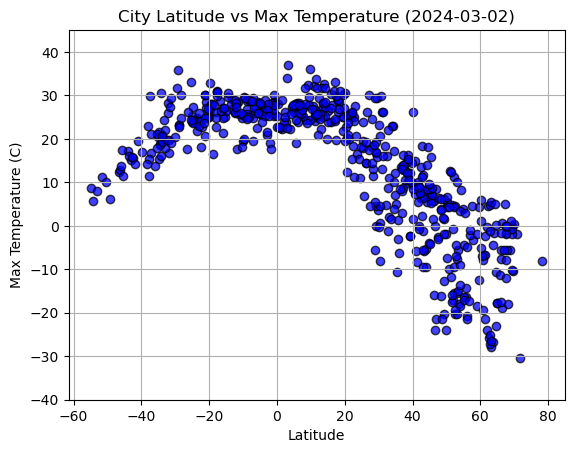

In [57]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, marker ="o", facecolor ="blue", edgecolors="black", alpha = 0.75)

# converting timestamp to a readable date format, unilizing the first record of the date from dataFrame
timestamp = city_data_df["Date"].iloc[0]
utc_time = time.gmtime(timestamp)

# formatting the UTC time into a readable string
readable_utc_time = time.strftime("%Y-%m-%d", utc_time)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({readable_utc_time})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.ylim(-40, 45)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

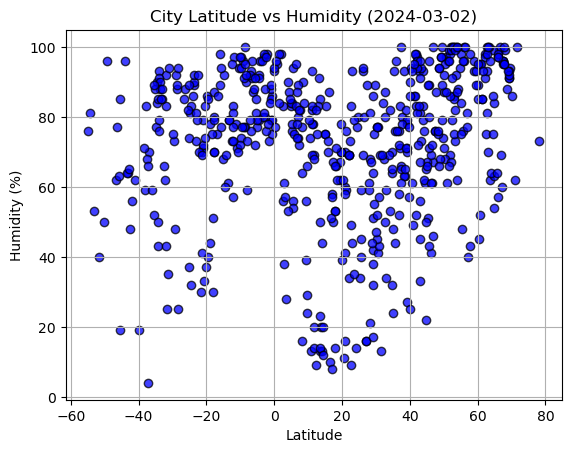

In [58]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker ="o", facecolor ="blue", edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({readable_utc_time})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

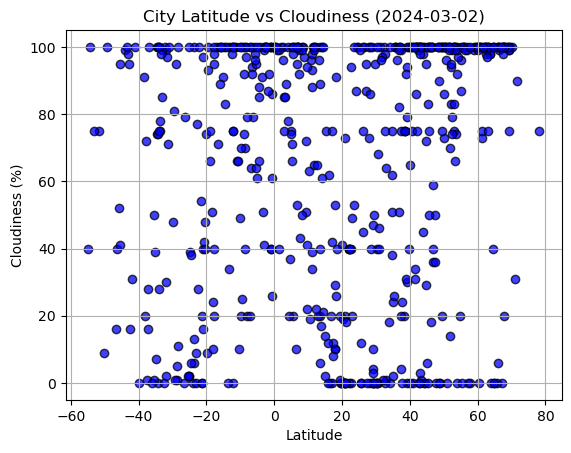

In [59]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker ="o", facecolor ="blue", edgecolors="black", alpha = 0.75)


# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({readable_utc_time})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

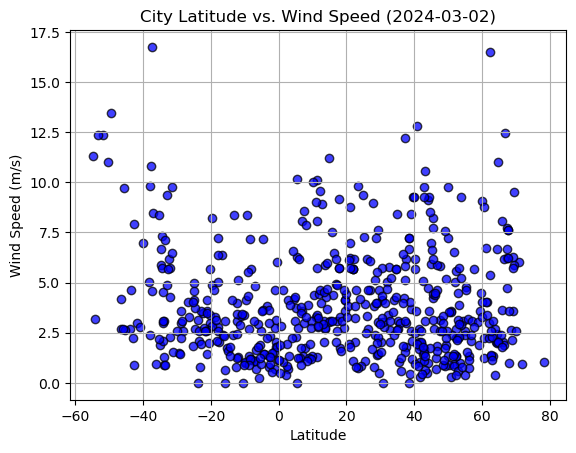

In [60]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker ="o", facecolor ="blue", edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({readable_utc_time})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [154]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values, color = "blue",alpha = 0.75)
    plt.plot(x_values, regress_values, "r-")
    return rvalue, intercept, rvalue, pvalue, stderr
    
    

In [132]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,piti village,13.4626,144.6933,25.03,85,20,2.06,GU,1709413832
2,changji,44.0167,87.3167,-9.56,79,100,1.00,CN,1709414004
4,longyearbyen,78.2186,15.6401,-8.09,73,75,1.03,SJ,1709413725
5,ribeira grande,38.5167,-28.7000,16.22,63,75,7.20,PT,1709413799
6,olonkinbyen,70.9221,-8.7187,-1.85,62,31,6.05,SJ,1709414004


In [133]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,outjo,-20.1167,16.1500,25.13,37,74,2.99,NaN,1709414004
3,kencong,-8.2833,113.3667,25.06,90,100,1.12,ID,1709414004
7,grytviken,-54.2811,-36.5092,5.66,81,100,3.18,GS,1709414005
10,alice springs,-23.7000,133.8833,24.75,89,100,0.00,AU,1709414005
13,uturoa,-16.7333,-151.4333,28.70,75,100,6.36,PF,1709414005


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6974586478888443


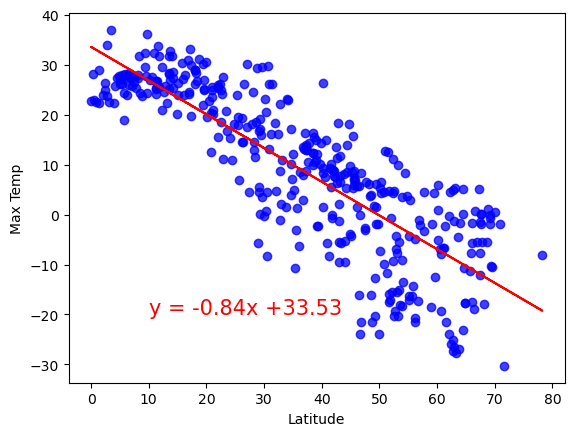

In [155]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#using the function for Linear Regression and retriving rvalue outside of the function

(slope, intercept, rvalue, pvalue, stderr) = create_linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.4346828704008895


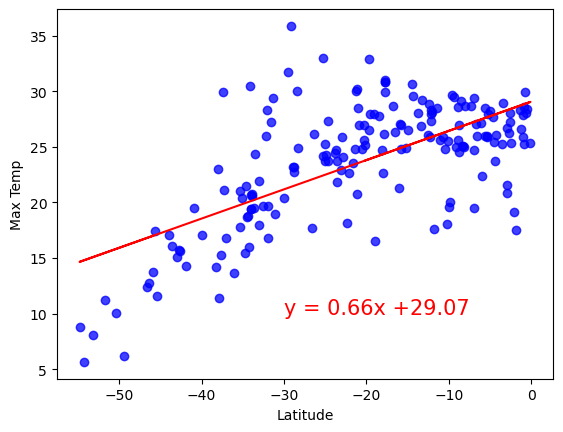

In [156]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#using the function for Linear Regression and retriving rvalue outside of the function

(slope, intercept, rvalue, pvalue, stderr) = create_linear_regression_plot(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The two above graphs and data indicate a strong correlation of temperature to latitude. In both hemispheres r-value is above 0. Even if data shows weaker correlation between those 2 factors in southern hemisphere, the trend is more than clear. Temperatures get higher the closer to the equator we get. It seems also, that temperature gets hardly every below 0 C on the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14121105590096183


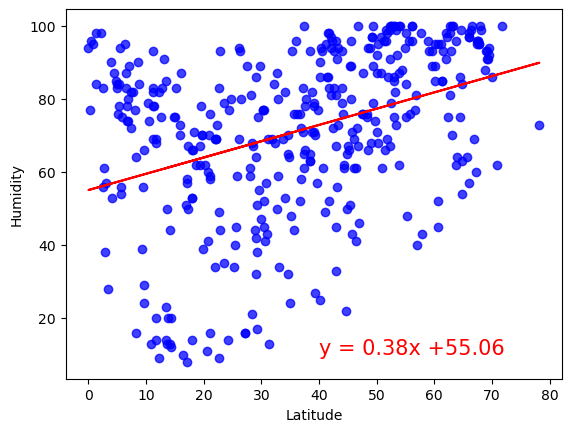

In [138]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#using the function for Linear Regression and retriving rvalue outside of the function

(slope, intercept, rvalue, pvalue, stderr) = create_linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")


The r-value is: 0.13548157503956246


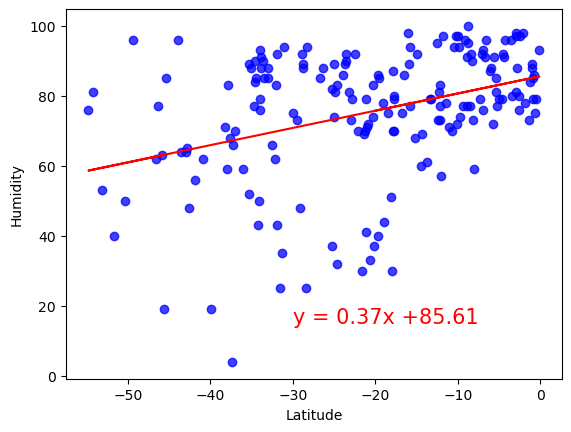

In [141]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#using the function for Linear Regression and retriving rvalue outside of the function

(slope, intercept, rvalue, pvalue, stderr) = create_linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** My data indicates there is a very weak correlation between humidity and latitude. ∣r∣ is closer to 0 in both hemispheres. In southern hemisphere humidity grown slightly when getting closer to the equator, however date from the norhtern hemisphere  shows the opposite trend -> humidity grows slightly with the growing distance to equator. My conclusion is, that given data points, there must be other factors that influence the humidity, like closeness to seas / oceans, ocean currents, air pressure...

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03850174333339229


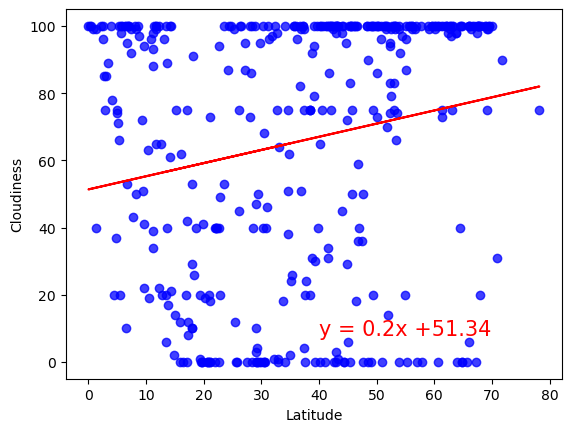

In [145]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#using the function for Linear Regression and retriving rvalue outside of the function

(slope, intercept, rvalue, pvalue, stderr) = create_linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")


The r-value is: 0.058621636899797686


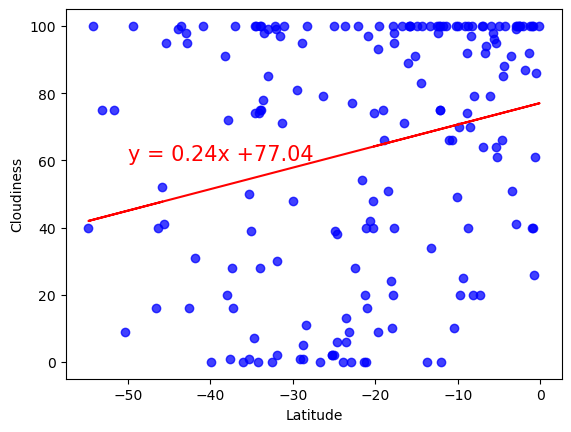

In [147]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#using the function for Linear Regression and retriving rvalue outside of the function

(slope, intercept, rvalue, pvalue, stderr) = create_linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** Cloudiness (just like humidity) shows small correlations to latitude - |rvalue| is close to 0. It most likely depands on other factors like clossness to oceans, fronts, terrain etc.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 1.6629209911710653e-05


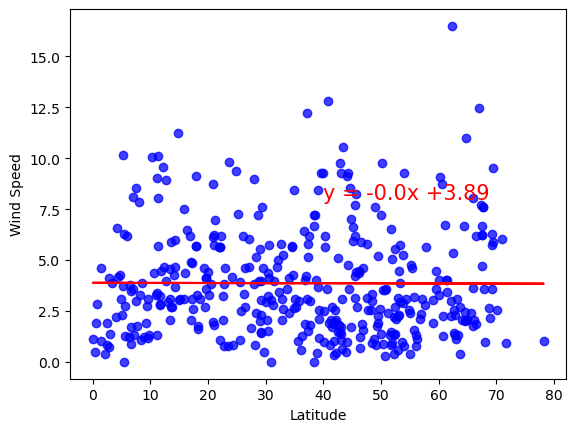

In [148]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#using the function for Linear Regression and retriving rvalue outside of the function

(slope, intercept, rvalue, pvalue, stderr) = create_linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.21408572248497856


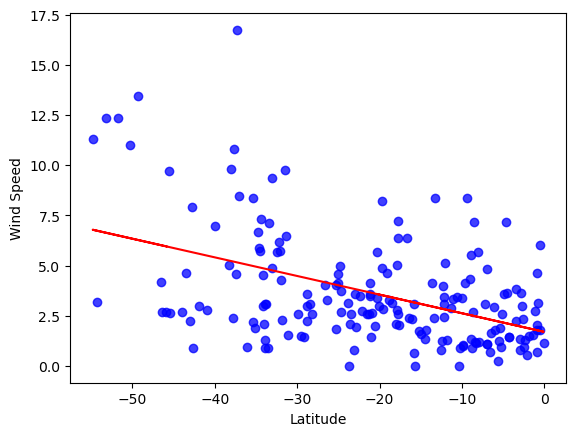

In [149]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#using the function for Linear Regression and retriving rvalue outside of the function

(slope, intercept, rvalue, pvalue, stderr) = create_linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** Correlations between wind / wind speed , based on  aquired data is extremely low. Esecially on the northern hemisphere. My conclusion would be that the relationship between wind and latitude is more complex and depands on many factors, beyond latitude alone.